In [326]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm
from modules.Utils.utils import loadFromDB, strategyTester
import pandas as pd

from random import randint


In [327]:
SYMBOL= 'BTC'
df = loadFromDB(f'../backtest_tools/database/database/Binance/1d/{SYMBOL}-USDT.csv').iloc[300:randint(700,900)]
#df["EMA20"] = ema_indicator(df["Close"], 20)
df.dropna(inplace=True)
print(df.shape)
df.head()

(561, 6)


,Open,High,Low,Close,Volume,Timestamp
Date,,,,,,
2020-10-27 01:00:00,13052.15,13789.29,13019.87,13636.17,80811.019450,1603756800
2020-10-28 01:00:00,13636.16,13859.48,12888.00,13266.40,94440.561226,1603843200
2020-10-29 01:00:00,13266.40,13642.91,12920.77,13455.70,74872.602132,1603929600
2020-10-30 01:00:00,13455.69,13669.98,13115.00,13560.10,70657.778881,1604016000
2020-10-31 01:00:00,13560.10,14100.00,13411.50,13791.00,67339.238515,1604102400


                        Close
Date                         
2020-10-27 01:00:00  13636.17
2020-10-28 01:00:00  13266.40
2020-10-29 01:00:00  13455.70
2020-10-30 01:00:00  13560.10
2020-10-31 01:00:00  13791.00
...                       ...
2022-05-06 02:00:00  36013.77
2022-05-07 02:00:00  35472.39
2022-05-08 02:00:00  34038.40
2022-05-09 02:00:00  30076.31
2022-05-10 02:00:00  31017.10

[561 rows x 1 columns]


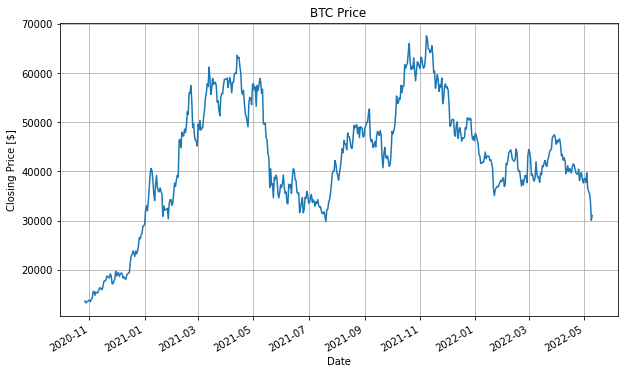

In [328]:
# Pulling Closing Price Data
hist = df[['Close']]
print(hist)

# Plotting Price Data
hist['Close'].plot(title=f"{SYMBOL} Price", ylabel=
                   "Closing Price [$]", figsize=[10, 6])
plt.grid()

In [329]:
days = [i for i in range(1, len(hist['Close'])+1)]
price_orig = hist['Close'].tolist()
change = hist['Close'].pct_change().tolist()
change = change[1:]  # Removing the first term since it is NaN

# Statistics for Use in Model
mean = np.mean(change)
std_dev = np.std(change)
print('\nMean percent change: ' + str(round(mean*100, 2)) + '%')
print('Standard Deviation of percent change: ' +   
      str(round(std_dev*100, 2)) + '%')


Mean percent change: 0.23%
Standard Deviation of percent change: 4.01%


Predicted closing price after 400 simulations: 31258.04 USDT
Predicted percent increase after 6 hours: 0.78 %
Probability of stock price increasing after 6 hours: 52.0 %


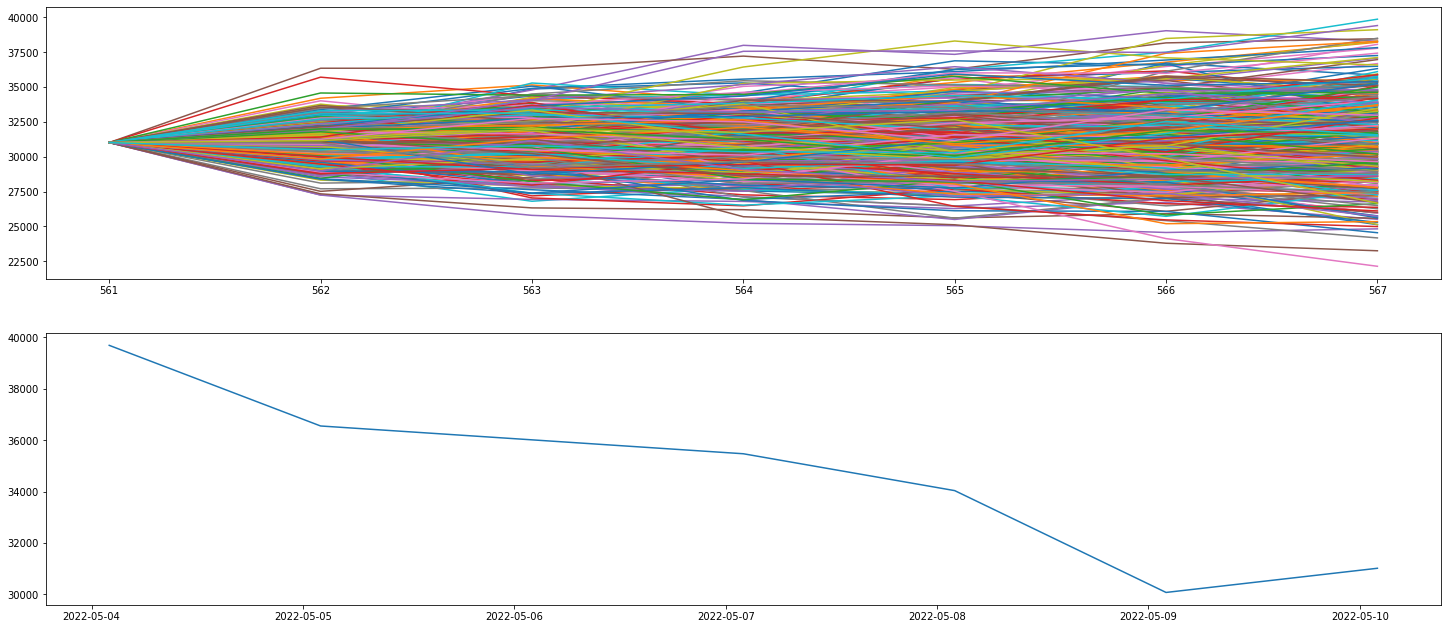

In [330]:
fig, ax = plt.subplots(2, figsize=(25,11))

# Initializing Lists for Analysis
close_end = []
above_close = []

simulations = 400# Change for more results
days_to_sim = 6 # 10 days


# For Loop for Number of Simulations Desired
for i in range(simulations):
    num_days = [days[-1]]
    close_price = [hist.iloc[-1, 0]]
    
    # For Loop for Number of Days to Predict
    for j in range(days_to_sim):
        num_days.append(num_days[-1]+1)
        perc_change = norm.ppf(random(), loc=mean, scale=std_dev)
        close_price.append(close_price[-1]*(1+perc_change))

    if close_price[-1] > price_orig[-1]:
        above_close.append(1)
    else:
        above_close.append(0)

    close_end.append(close_price[-1])
    ax[0].plot(num_days, close_price)
    
# Average Closing Price and Probability of Increasing After 1 Year
average_closing_price = sum(close_end)/simulations
average_perc_change = (average_closing_price-price_orig[-1])/price_orig[-1]
probability_of_increase = sum(above_close)/simulations

print(f'Predicted closing price after {simulations} simulations: {round(average_closing_price, 2)} USDT')
print(f'Predicted percent increase after {days_to_sim} hours: {round(average_perc_change*100, 2)} %')
print(f'Probability of stock price increasing after {days_to_sim} hours: {round(probability_of_increase*100, 2)} %')

ax[1].plot(df.Close.iloc[-1-days_to_sim:].index, df.Close.iloc[-1-days_to_sim:], label='Real')


(array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  2.,  4.,  3.,  5.,
         3.,  2.,  5.,  4.,  9., 13., 10., 10., 10., 10., 13., 14., 14.,
         8., 16., 15., 17., 10., 17., 15., 19., 11., 16., 11., 10.,  7.,
        17.,  9.,  7., 12.,  4., 10.,  7.,  5.,  2.,  2.,  1.,  3.,  2.,
         1.,  2.,  4.,  2.,  0.,  1.,  1.,  1.]),
 array([22142.17923989, 22437.56750742, 22732.95577495, 23028.34404248,
        23323.73231001, 23619.12057754, 23914.50884507, 24209.8971126 ,
        24505.28538012, 24800.67364765, 25096.06191518, 25391.45018271,
        25686.83845024, 25982.22671777, 26277.6149853 , 26573.00325283,
        26868.39152036, 27163.77978789, 27459.16805542, 27754.55632295,
        28049.94459048, 28345.33285801, 28640.72112554, 28936.10939307,
        29231.4976606 , 29526.88592813, 29822.27419565, 30117.66246318,
        30413.05073071, 30708.43899824, 31003.82726577, 31299.2155333 ,
        31594.60380083, 31889.99206836, 32185.38033589, 32480.76860342,
        32

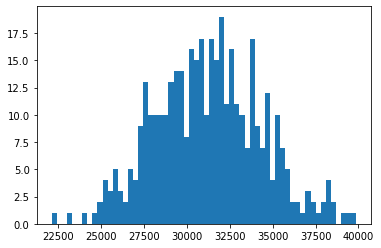

In [331]:
plt.hist(close_end, bins=60)